## Ground truth
Top 10 most and least affected countries has been taken from [German Watch](https://www.germanwatch.org/sites/default/files/2025-02/Climate%20Risk%20Index%202025.pdf)

In [13]:
top_10_affected = ['Dominica', 'China', 'Honduras', 'Myanmar', 'Italy', 'India','Greece', 'Spain', 'Vanuatu', 'Philippines']
bottom_10_affected = ['Iceland', 'Russia', 'Luxembourg', 'Estonia', 'Finland','Norway', 'Sweden', 'Denmark', 'Singapore', 'Saudi Arabia']

### DEMOGRAPHIC ASPECTS

**RQ#3** *Do countries with higher birth rates or younger population have greater climate stress?*

In [32]:
import pandas as pd

df_demo = pd.read_csv('./datasets/3-countries-demographic-stats.csv')
df_climate = pd.read_csv('./datasets/4-countries-climate-watchdata.csv')
df_social = pd.read_csv('./datasets/7-social_data.csv')

df_demo['Country'] = df_demo['Country'].str.strip()
df_climate['Country'] = df_climate['Country'].str.strip()
df_social['Country'] = df_social['Country'].str.strip()

demo_features = df_demo[['Country', 'Births per Day']]
climate_features = df_climate[['Country', 'ND-GAIN Vulnerability Score']]
age_data = df_social[df_social['Indicator'].str.contains('0-14', case=False, na=False)]
age_data = df_social[df_social['Indicator'].str.contains('0-14', case=False, na=False)]
age_data = age_data.sort_values('Year', ascending=False).drop_duplicates('Country')
age_data['Country'] = age_data['Country'].str.strip()
age_data['Value'] = age_data['Value'].astype(str).str.strip().str.split('/').str[0].str.strip()
age_data['Value'] = pd.to_numeric(age_data['Value'], errors='coerce')
age_features = age_data[['Country', 'Value']].rename(columns={'Value': '% Population aged 0-14'})


merged_df = pd.merge(demo_features, age_features, on='Country', how='left')
merged_df = pd.merge(merged_df, climate_features, on='Country', how='left')
merged_df['High_Vulnerability'] = merged_df['Country'].apply(lambda x: 1 if x.strip() in top_10_affected else (0 if x.strip() in bottom_10_affected else None))
merged_df = merged_df[merged_df['High_Vulnerability'].notnull()].reset_index(drop=True)

merged_df['Births per Day'] = merged_df['Births per Day'].astype(str).str.replace(',', '', regex=False)
merged_df['Births per Day'] = pd.to_numeric(merged_df['Births per Day'], errors='coerce')
merged_df['% Population aged 0-14'] = pd.to_numeric(merged_df['% Population aged 0-14'], errors='coerce')
merged_df['ND-GAIN Vulnerability Score'] = pd.to_numeric(merged_df['ND-GAIN Vulnerability Score'], errors='coerce')

print("Merged clean dataset:")
display(merged_df.head())


Merged clean dataset:


,Country,Births per Day,% Population aged 0-14,ND-GAIN Vulnerability Score,High_Vulnerability
0,China,23845,17.6,NaN,1.0
1,Dominica,2,NaN,0.45,1.0
2,Denmark,162,16.3,0.34,0.0
3,Spain,904,14.2,0.30,1.0
4,Estonia,29,16.5,0.34,0.0


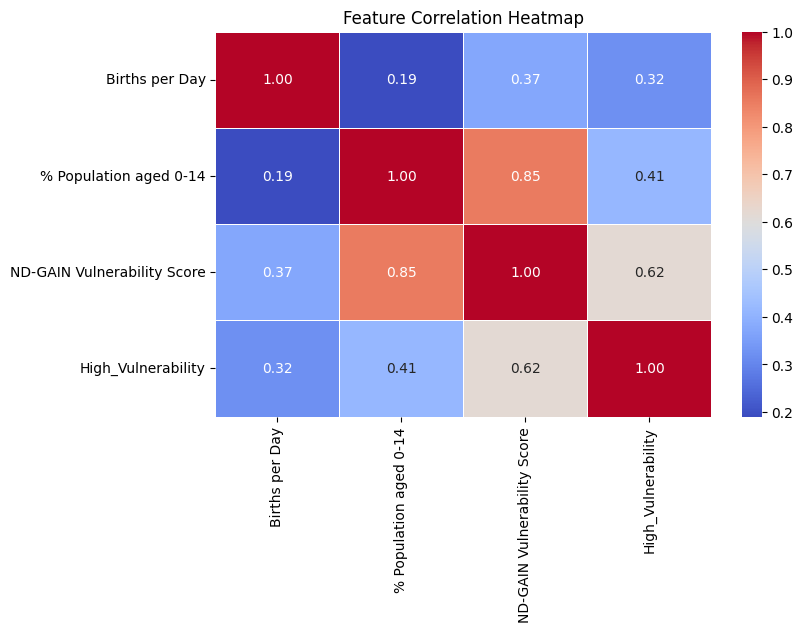

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
corr = merged_df[['Births per Day', '% Population aged 0-14', 'ND-GAIN Vulnerability Score', 'High_Vulnerability']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

### 📊 Inference:

- ✅ **ND-GAIN Vulnerability Score** shows a strong positive correlation (**0.85**) with **% Population aged 0-14**, indicating that countries with a higher percentage of younger population tend to have higher climate vulnerability.
- ✅ **ND-GAIN Score** also correlates well (**0.62**) with the **High_Vulnerability** classification, confirming it as a strong indicator of climate risk.
- ✅ **Births per Day** shows a moderate correlation (~**0.32**) with **High_Vulnerability**, but is not as impactful as age distribution or ND-GAIN score.
- ✅ **% Population aged 0-14** also correlates moderately (**0.41**) with **High_Vulnerability**, further supporting that demographics play a key role in climate sensitivity.

---

### 📌 Hypothesis:

> Social and demographic factors, especially a younger population profile, appear to be important contributors to a country’s climate vulnerability.

> Measures: Economic or policy interventions may need to consider **age structure** when planning **resilience strategies**.

